<img src="images/Peoplelogy-Logo.png" style="height: 100px;" align=left>

# Capstone Project
#### Designed by:
Uzair Aslam (uzairaslam19@yahoo.com)


## Submission Guideline

- Your jupyter notebook(s)
- PowerPoint Slides
- Presentation, 12 minutes + 3 minutes Q/A

## The Use Case
#### **This a financial Dataset from a bank in Europe, and consists of 8 CSV files. Descriptions of which are as follows. You are provided a data set (in csv format) containing the following data**


**Account (4500 Observations)** - Each record describes static characteristics of an account

**Client (5369 Observations)** - Each record describes characteristics of a client

**Relationship (disp) (5369 Observations)** - Each record relates together a client with an account (*relationship.csv*)

**Order (6471 Observations)** - Each record describes characteristics of a payment order

**Transaction (1056320 Observations)** - Each record describes one transaction on an account

**Loan (682 Observations)** - Each record describes a loan granted for a given account

**Credit card (892 Observations)** - Each record describes a credit card issued to an account

**Demographic data (77 Observations)** - Each record describes demographic characteristics of a district.

### ER Diagram for the Dataset
<table><tr><td><img src="images/ERDagram.png"></td></tr></table>

## PART 1: SQL

### **CONNECT to the Banking_data.db through jupyter or DB Viewer, and answer the following questions.**
- You are required to provide the answer as well as the query that you wrote

### **i.Find the average loan amount in the loan table**

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///Banking_data.db

In [3]:
%sql SELECT sql from sqlite_master WHERE type='table';

 * sqlite:///Banking_data.db
Done.


sql
"CREATE TABLE ""account"" (""account_id"" INTEGER, ""district_id"" INTEGER, ""frequency"" TEXT, ""date"" INTEGER)"
"CREATE TABLE ""card"" (""card_id"" INTEGER, ""disp_id"" INTEGER, ""type"" TEXT, ""issued"" TEXT)"
"CREATE TABLE ""client"" (""client_id"" INTEGER, ""birth_number"" INTEGER, ""district_id"" INTEGER)"
"CREATE TABLE ""district"" (""A1"" INTEGER, ""A2"" TEXT, ""A3"" TEXT, ""A4"" INTEGER, ""A5"" INTEGER, ""A6"" INTEGER, ""A7"" INTEGER, ""A8"" INTEGER, ""A9"" INTEGER, ""A10"" REAL, ""A11"" INTEGER, ""A12"" TEXT, ""A13"" REAL, ""A14"" INTEGER, ""A15"" TEXT, ""A16"" INTEGER)"
"CREATE TABLE ""loan"" (""loan_id"" INTEGER, ""account_id"" INTEGER, ""date"" INTEGER, ""amount"" INTEGER, ""duration"" INTEGER, ""payments"" REAL, ""status"" TEXT)"
"CREATE TABLE ""orders"" (""order_id"" INTEGER, ""account_id"" INTEGER, ""bank_to"" TEXT, ""account_to"" INTEGER, ""amount"" REAL, ""k_symbol"" TEXT)"
"CREATE TABLE ""relationship"" (""disp_id"" INTEGER, ""client_id"" INTEGER, ""account_id"" INTEGER, ""type"" TEXT)"
"CREATE TABLE ""transactions"" (""trans_id"" INTEGER, ""account_id"" INTEGER, ""date"" INTEGER, ""type"" TEXT, ""operation"" TEXT, ""amount"" REAL, ""balance"" REAL, ""k_symbol"" TEXT, ""bank"" TEXT, ""account"" REAL)"


In [4]:

%%sql
SELECT AVG(amount)
FROM loan

 * sqlite:///Banking_data.db
Done.


AVG(amount)
151410.1759530792


### **ii. What is the total number of accounts in the account table?**

In [5]:
%%sql
SELECT COUNT(account_id)
FROM account

 * sqlite:///Banking_data.db
Done.


COUNT(account_id)
4500


### **iii. Find all clients who have a loan but no credit card.**
#### **Part A: Fetch the list of all clients who have a loan but no credit card.**
#### **Part B: Count the number of clients who meet this condition.**

In [6]:
%%sql
SELECT *
FROM loan
LIMIT 1

 * sqlite:///Banking_data.db
Done.


loan_id,account_id,date,amount,duration,payments,status
5314,1787,930705,96396,12,8033.0,B


In [14]:
%%sql
SELECT 
L.account_id, 
R.account_id,
R.disp_id,
C.disp_id
FROM loan AS L
INNER JOIN 
    relationship AS R ON R.account_id = L.account_id
LEFT JOIN 
    card AS C ON C.disp_id = R.disp_id
WHERE C.disp_id IS NULL
LIMIT 10;

 * sqlite:///Banking_data.db
Done.


account_id,account_id_1,disp_id,disp_id_1
1787,1787,2166,None
1801,1801,2181,None
9188,9188,11006,None
8261,8261,9892,None
8261,8261,9893,None
11265,11265,13537,None
5428,5428,6551,None
10973,10973,13182,None
10364,10364,12446,None
10364,10364,12447,None


In [15]:
%%sql
SELECT 
 COUNT(DISTINCT R.disp_id) AS count_client
FROM loan AS L
INNER JOIN 
    relationship AS R ON R.account_id = L.account_id
LEFT JOIN 
    card AS C ON C.disp_id = R.disp_id
WHERE C.disp_id IS NULL;


 * sqlite:///Banking_data.db
Done.


count_client
657


### **iv. Find the total loan amount issued for each district.**
#### **Part A: Display the total loan amount issued for each district.**
#### **Part B: Count how many districts have a total loan amount greater than a  1,000,000.**

In [18]:
%%sql
SELECT Acc.district_id,SUM(L.amount) AS Total_loan
FROM loan AS L
INNER JOIN account AS Acc ON L.account_id = Acc.account_id
GROUP BY district_id
ORDER BY Acc.district_id;


 * sqlite:///Banking_data.db
Done.


district_id,Total_loan
1,12932412
2,887952
3,1460796
4,1106520
5,1901160
6,2095980
7,557796
8,617520
9,1005084
10,859464


In [27]:
%%sql
SELECT Acc.district_id, SUM(L.amount) AS Total_loan
FROM loan AS L
INNER JOIN account AS Acc ON L.account_id = Acc.account_id
GROUP BY Acc.district_id
HAVING SUM(L.amount) > 1000000
ORDER BY Acc.district_id;


 * sqlite:///Banking_data.db
Done.


district_id,Total_loan
1,12932412
3,1460796
4,1106520
5,1901160
6,2095980
9,1005084
11,1233096
12,1299192
14,2010924
16,1339572


#### **v. Fetch the top 5 clients with the highest loan payments.**


In [31]:

%%sql
SELECT payments
FROM loan 
ORDER BY payments DESC
LIMIT 5

 * sqlite:///Banking_data.db
Done.


payments
9910.0
9847.0
9736.0
9721.0
9698.0


#### **vi. List the districts where more than 100 accounts have been opened.**

In [37]:
%%sql
SELECT COUNT(DISTINCT account_id) AS Count_acc, district_id
FROM account
GROUP BY district_id
HAVING COUNT(DISTINCT account_id) > 100;


 * sqlite:///Banking_data.db
Done.


Count_acc,district_id
554,1
128,54
152,70
135,74


#### **vii. Count of all transactions where the transaction amount is above the average transaction amount for that account.**

In [42]:
%%sql
SELECT AVG(amount) 
FROM transactions


 * sqlite:///Banking_data.db
Done.


AVG(amount)
5924.145675836868


In [51]:
%%sql
SELECT COUNT(T.amount) AS Count_Trans
FROM transactions AS T
WHERE T.amount > (SELECT AVG(amount) FROM transactions);


 * sqlite:///Banking_data.db
Done.


Count_Trans
297057


#### **viii. Find the total loan amount per district.**
#### **Part A: Display the total loan amount issued per district.**
#### **Part B: Count the number of districts where the total loan amount is above 500,000.**



In [52]:
%%sql
SELECT Acc.district_id, SUM(L.amount) AS Total_loan
FROM loan AS L
INNER JOIN account AS Acc ON L.account_id = Acc.account_id
GROUP BY Acc.district_id
ORDER BY Acc.district_id
LIMIT 10

 * sqlite:///Banking_data.db
Done.


district_id,Total_loan
1,12932412
2,887952
3,1460796
4,1106520
5,1901160
6,2095980
7,557796
8,617520
9,1005084
10,859464


In [59]:
%%sql
SELECT COUNT(Acc.district_id) AS Count_Districts, Acc.district_id
FROM loan AS L
INNER JOIN account AS Acc ON L.account_id = Acc.account_id
GROUP BY Acc.district_id
HAVING SUM(L.amount) > 500000;


 * sqlite:///Banking_data.db
Done.


Count_Districts,district_id
84,1
6,2
6,3
7,4
10,5
9,6
6,7
5,8
9,9
5,10


### **ix. Find all clients who own multiple accounts.**

In [68]:
%%sql
SELECT COUNT(DISTINCT account_id) AS Count_acc, C.district_id
FROM client AS C
INNER JOIN account AS A ON C.district_id = A.district_id
GROUP BY C.district_id
HAVING COUNT(DISTINCT A.account_id) > 1;

 * sqlite:///Banking_data.db
Done.


Count_acc,district_id
554,1
42,2
50,3
48,4
65,5
48,6
44,7
56,8
46,9
48,10


#### **x. List all credit card types available in the system.**

In [75]:
%%sql
SELECT type 
FROM card 
GROUP BY type

 * sqlite:///Banking_data.db
Done.


type
classic
gold
junior


## PART 2. PYTHON - Conduct exploratory data analysis to answer the following questions:

**Hint:**
- Use Pandas to solve these questions (not mandatory but preferable).
- This part also requires you to plot where necessary.
- You can load the data to Pandas Dataframes directly from the DB with the code as below
```
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite Database
db_path = 'path_to_your_database.db'  # Replace with the actual path to your database
conn = sqlite3.connect(db_path)

# Step 2: Load Data from Database Tables into Pandas DataFrames
# Example: Loading the 'client' table
client_df = pd.read_sql_query("SELECT * FROM client", conn)


# Step 3: Close the database connection after loading the data
conn.close()
```

**Incase you get DB error, then please feel free to directly load the csv files provided. Please Note that you have to load all the csv files, as you need all of them to answer the questions below.**

### a. Clients
#### i. Which Districts have the highest number of customers? Try to visualize your Answer using seaborn

	Hints:

	1.	Hint 1:
You need to join the client table with the account table using the common column account_id. After that, you can group by district_id to count how many customers are in each district.
	•	Tip: Use pd.merge() to combine the DataFrames and groupby() to aggregate the data.

	2.	Hint 2:
To visualize, you can use a bar plot with district_id on the x-axis and the count of customers on the y-axis. Seaborn’s barplot() is ideal for this.
	•	Tip: Use Seaborn’s sns.barplot() function for the visualization.

In [ ]:
#Your Code Here

import sqlite3
import pandas as pd
pd.set_option('display.max_colwidth', None)
conn = sqlite3.connect('Banking_data.db')
df = pd.read_sql_query("SELECT * FROM client", conn)
df.head()

   district_id  customers
0            1        663
1           74        180
2           70        169
3           54        155
4           64        109


C:\Users\USER\AppData\Local\Temp\ipykernel_10756\2209647963.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='district_id', y='customers', palette='viridis')


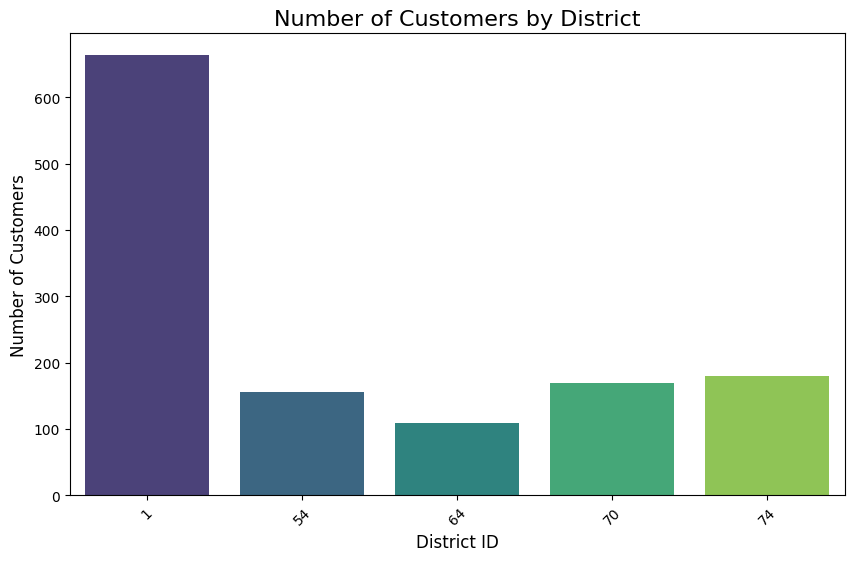

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
conn = sqlite3.connect('Banking_data.db')

# Execute the query
query = '''
SELECT 
    A.district_id,
    COUNT(DISTINCT C.client_id) AS customers
FROM 
    client AS C
INNER JOIN 
   account AS A ON C.district_id= A.district_id
GROUP BY 
    A.district_id
ORDER BY 
    customers DESC
    
    LIMIT 5;
'''

df = pd.read_sql_query(query, conn)

# Display the top districts with the most customers
print(df)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='district_id', y='customers', palette='viridis')
plt.title('Number of Customers by District', fontsize=16)
plt.xlabel('District ID', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### ii. Which district have shown a significant decline in the monthly number of accounts opened?

	Hints:

	1.	Hint 1:
Start by extracting the month and year from the date column in the account table. Then group by district_id and month/year to calculate the number of accounts opened per district each month.

	•	Tip: Use pd.to_datetime() to convert the date and .dt.to_period('M') to extract the year and month.

	2.	Hint 2:
To detect a significant decline, calculate the percentage change in the number of accounts opened for each district month-over-month. Focus on identifying districts with large negative changes.

	•	Tip: Use groupby() and pct_change() to find the percentage change in account openings.


In [ ]:
conn = sqlite3.connect('Banking_data.db')

# Load the account data
account = pd.read_sql_query("SELECT * FROM account", conn)

#convert date and extract the year and month
account['date'] = pd.to_datetime(account['date']) 
account['month_year'] = account['date'].dt.to_period('M')

#Group by district_id and month/year to count accounts
monthly_acc = account.groupby(['district_id', 'month_year']).size().reset_index(name='num_accounts')

#Calculate the percentage change
monthly_acc['pct_change'] = monthly_acc.groupby('district_id')['num_accounts'].pct_change()

#Filter districts with significant decline
significant_decline = monthly_acc[monthly_acc['pct_change'] < -0.5] 

print(significant_decline)


In [ ]:
conn = sqlite3.connect('Banking_data.db')

# Execute the query
query = '''
SELECT 
    district_id
    date
FROM 
    account

GROUP BY 
    date
WHERE date= 
ORDER BY 
    customers DESC
    
    LIMIT 5;
'''

df = pd.read_sql_query(query, conn)

# Display the top districts with the most customers
print(df)

#### iii. How many of our clients are men/women?

	Hints:

	•	Females have +50 added to their Month in Date of birth,so whereas a normal month will be 01-12,
		females may have 51-62
	•	Its better to create a new column Named Gender.
	•	Try to utilize .str[] method and extract the Month part of the date.


In [ ]:
#Your Code Here

#### iv. In the client DataFrame, check if the birthdate column is in the correct format (YYYY-MM-DD). If not, convert it to the correct datetime format.

	•	Hint: Use pd.to_datetime() to ensure the column is in datetime format.
	•	Females have +50 added to their Month in Date of birth. You may need to handle this beforehand

In [ ]:
#Your Code Here

####  v. Calculate the age of each client and add it as a new column in the client_df DataFrame. Use the birth_number column to determine the birth year, month, and day. Then, calculate the age based on the current year.
    •   	Hints:
	•	The birth_number field is in the format YYMMDD, where:
	•	YY is the last two digits of the year.
	•	MM is the month of birth (note: for women, 50 is added to the month).
	•	DD is the day of birth.

	•	Steps:
	1.	Extract the year, month, and day from the birth_number column.
	2.	Handle cases where MM is greater than 50 (i.e., for women).
	3.	Convert the extracted birth date into a datetime object.
	4.	Subtract the birth year from the current year to calculate age.


In [ ]:
#Your Code Here

### b. Credit Cards


#### i. Which card types are popular among the various client categories (gender/age group/region)?
      Hints:
- You can read the query in pandas and plot for ease

In [ ]:
#Your Code Here

#### ii. What is the trend of card issuance at the various branches?

	Hints:
You can analyze the issuance dates from the card table. First, ensure that the issued column (which stores the issuance date) is converted to a datetime format.

	•	Tip: Use pd.to_datetime() to convert the issued column to a datetime format.
    
After you have processed the issuance dates, group by the branch (district_id) and the issuance period (month or year) to observe the trend of card issuance over time at different branches.

	•	Tip: Use groupby() on district_id and the issuance date (grouped by month or year), and then visualize using Seaborn to observe trends.

In [ ]:
#Your Code Here

### c. Loans


#### i. What is the distribution of loan quantum given out by the bank?

	Hints:
You can use a bar chart or histogram to plot the distribution


In [ ]:
#Your Code Here

#### ii. What is the relation between loan quantum and average salary?

	Hint:
You can utilize a scatter plot to plot the relationship. Make sure both variables are of the correct type.


In [ ]:
#Your Code Here

#### iii. Examine the relationship between the number of loans in arrears and the unemployment rate at the time.

	Hints:

	1.	Hint 1:
Filter the loan table for loans in arrears (e.g., status ‘B’ for overdue).

	•	Tip: Use .loc[] to filter by loan status
	2.	Hint 2:
Merge the loan table with the district table to get the unemployment rate by district.

	•	Tip: Use pd.merge() on district_id.
	3.	Hint 3:
Compare the number of loans in arrears per district with the unemployment rate using a scatter plot.

	•	Tip: Use sns.scatterplot() to visualize the relationship.

In [ ]:
#Your Code Here

#### iv. In the loan DataFrame, check for outliers in the amount column.
#### Remove or treat the outliers based on the interquartile range (IQR) method (outliers are values that are 1.5 times the IQR above the third quartile or below the first quartile).

	•	Hint: Use .quantile() to calculate the IQR and .loc[] to filter outliers.

In [ ]:
#Your Code Here

### d. Transactions

#### i. Which region has the lowest average number of transactions?

In [ ]:
#Your Code Here

#### ii. What is the breakdown of the various transaction types?

	Hint: Use a bar chart to show the distribution of different transaction types (e.g., k_symbol).
	•	Tip: Use sns.countplot() to create a bar plot showing the frequency of each transaction type.

In [ ]:
#Your Code Here

#### iii. What are the top 5 accounts with the highest total transaction amounts?
	Hint:
Group the transactions by account_id, calculate the total amount for each account, and visualize the top 5 accounts using a bar plot.

	•	Tip: Use groupby() to calculate the total amounts and sns.barplot() for visualization.

In [ ]:
#Your Code Here

## 3- (Merging- Data Cleaning)
### Merge the entire Data , keeping in mind that all observations in the loan table are important as these are the people who applied for loans

In [ ]:
#Your Code Here

#### i. Preprocess the data and handle any missing values after merging

In [ ]:
#Your Code Here

#### ii. (Optional) Check for the outliers and anomalies

In [ ]:
#Your Code Here

#### iii. (Optional) Check the variables A15 and A16 in the district table, do you see any unsual thing?

In [ ]:
#Your Code Here

#### iv. (Optional) Convert all polish column names to english according to the data dictionary. For example, change 'POPLATEK MESICNE' to 'MONTHLY'.
Hint:
- Use SQL CASE statement in Pandas SQL

In [ ]:
#Your Code Here

#### v. (Optional) Handle Transaction Table as a single user may have multiple transactions, Try to create high level feature.

In [ ]:
#Your Code Here

# PART 3: Machine Learning

In this section, you will prepare the dataset for machine learning and implement either supervised or unsupervised learning.

---

## Step 1: Data Preparation

### 1.1 Handle Missing Values
- Check the dataset for missing values.
- If any are found, explain how you handle them (e.g., filling with median or dropping rows).
- Implement your solution for missing values.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import davies_bouldin_score

In [2]:
# Your Code Here
dataset = pd.read_csv("merged_data.csv")
dataset.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13152\1320423392.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("merged_data.csv")


,loan_id,account_id,date_x,amount_x,duration,payments,status,district_id,frequency,date_y,...,type,operation,amount_y,balance,k_symbol,bank,account,A1,A3,A12
0,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN,30,west Bohemia,3.38
1,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,9900.0,11000.0,NaN,NaN,NaN,30,west Bohemia,3.38
2,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,5800.0,16800.0,NaN,NaN,NaN,30,west Bohemia,3.38
3,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,3300.0,20100.0,NaN,NaN,NaN,30,west Bohemia,3.38
4,5314,1787,930705,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,...,PRIJEM,VKLAD,42248.0,62348.0,NaN,NaN,NaN,30,west Bohemia,3.38


In [3]:
dataset.dtypes

loan_id          int64
account_id       int64
date_x           int64
amount_x         int64
duration         int64
payments       float64
status          object
district_id      int64
frequency       object
date_y          object
year_month      object
trans_id         int64
date             int64
type            object
operation       object
amount_y       float64
balance        float64
k_symbol        object
bank            object
account        float64
A1               int64
A3              object
A12             object
dtype: object

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191556 entries, 0 to 191555
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   loan_id      191556 non-null  int64  
 1   account_id   191556 non-null  int64  
 2   date_x       191556 non-null  int64  
 3   amount_x     191556 non-null  int64  
 4   duration     191556 non-null  int64  
 5   payments     191556 non-null  float64
 6   status       191556 non-null  object 
 7   district_id  191556 non-null  int64  
 8   frequency    191556 non-null  object 
 9   date_y       191556 non-null  object 
 10  year_month   191556 non-null  object 
 11  trans_id     191556 non-null  int64  
 12  date         191556 non-null  int64  
 13  type         191556 non-null  object 
 14  operation    160218 non-null  object 
 15  amount_y     191556 non-null  float64
 16  balance      191556 non-null  float64
 17  k_symbol     99109 non-null   object 
 18  bank         50513 non-n

In [5]:
dataset.isnull().sum()

loan_id             0
account_id          0
date_x              0
amount_x            0
duration            0
payments            0
status              0
district_id         0
frequency           0
date_y              0
year_month          0
trans_id            0
date                0
type                0
operation       31338
amount_y            0
balance             0
k_symbol        92447
bank           141043
account        128931
A1                  0
A3                  0
A12                 0
dtype: int64

In [6]:
account_mean = dataset['account'].mean()
account_mean

40253865.346986026

In [9]:
dataset['account'] = dataset['account'].replace(np.nan,account_mean)

In [ ]:
#drop object

In [10]:
dataset = dataset.drop(columns=['frequency','date_y','year_month','A3','A12'])


In [11]:
dataset = dataset.drop(columns=['operation'])

In [12]:
dataset = dataset.drop(columns=['status'])

In [13]:
dataset = dataset.drop(columns=['k_symbol'])

In [14]:
dataset = dataset.drop(columns=['bank'])

In [15]:
dataset = dataset.drop(columns=['type'])

In [ ]:
#to check column that already drop

In [16]:
dataset.isnull().sum()

loan_id        0
account_id     0
date_x         0
amount_x       0
duration       0
payments       0
district_id    0
trans_id       0
date           0
amount_y       0
balance        0
account        0
A1             0
dtype: int64

In [17]:
dataset.head()

,loan_id,account_id,date_x,amount_x,duration,payments,district_id,trans_id,date,amount_y,balance,account,A1
0,5314,1787,930705,96396,12,8033.0,30,523621,930322,1100.0,1100.0,4.025387e+07,30
1,5314,1787,930705,96396,12,8033.0,30,524054,930421,9900.0,11000.0,4.025387e+07,30
2,5314,1787,930705,96396,12,8033.0,30,524055,930521,5800.0,16800.0,4.025387e+07,30
3,5314,1787,930705,96396,12,8033.0,30,524056,930620,3300.0,20100.0,4.025387e+07,30
4,5314,1787,930705,96396,12,8033.0,30,523624,930708,42248.0,62348.0,4.025387e+07,30



### 1.2 Normalize the Variables
- Normalize all numerical variables using one of the following techniques:
  - MinMaxScaler
  - StandardScaler
- Explain why normalization is essential for machine learning.

In [25]:
from sklearn.preprocessing import StandardScaler


features = dataset[['balance', 'payments', 'amount_y', 'amount_x']]

# Initialize the scaler
scaler = StandardScaler()

# Standardize the features
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for easier handling
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the standardized DataFrame
print(scaled_data)


         balance  payments  amount_y  amount_x
0      -1.698555  1.746229 -0.608421 -0.454576
1      -1.600428  1.746229  0.137621 -0.454576
2      -1.425393  1.746229 -0.209967 -0.454576
3      -1.276679  1.746229 -0.421910 -0.454576
4       0.953601  1.746229  2.880003 -0.454576
...          ...       ...       ...       ...
191551 -1.464905 -0.071730 -0.361295  0.854370
191552 -0.002900 -0.071730  1.451163  0.854370
191553 -0.232774 -0.071730 -0.376131  0.854370
191554 -0.217198 -0.071730 -0.690850  0.854370
191555 -0.225100 -0.071730 -0.690443  0.854370

[191556 rows x 4 columns]


In [ ]:
#Normalization is essential in machine learning because it ensures that features are on a comparable scale, which can significantly improve the performance and stability of algorithms. 

### 1.3 Encode Categorical Variables
- Convert categorical variables into numerical values using one of the following:
  - One-hot encoding
  - Label encoding
- Justify your choice of encoding method.

In [19]:
from sklearn.preprocessing import LabelEncoder


# Label encoding
label_encoder = LabelEncoder()
dataset['balance'] = label_encoder.fit_transform(dataset['balance'])
print(dataset)


        loan_id  account_id  date_x  amount_x  duration  payments  \
0          5314        1787  930705     96396        12    8033.0   
1          5314        1787  930705     96396        12    8033.0   
2          5314        1787  930705     96396        12    8033.0   
3          5314        1787  930705     96396        12    8033.0   
4          5314        1787  930705     96396        12    8033.0   
...         ...         ...     ...       ...       ...       ...   
191551     6748        8645  981208    240900        60    4015.0   
191552     6748        8645  981208    240900        60    4015.0   
191553     6748        8645  981208    240900        60    4015.0   
191554     6748        8645  981208    240900        60    4015.0   
191555     6748        8645  981208    240900        60    4015.0   

        district_id  trans_id    date  amount_y  balance       account  A1  
0                30    523621  930322    1100.0     1285  4.025387e+07  30  
1                

In [ ]:

#Label encoding to use when the categorical variable is ordinal (has a meaningful order).
#Example: Size (Small < Medium < Large).
#Memory efficient, as it requires only one column.
#Use label encoding for ordinal variables like Size to preserve the meaningful order.

### 1.4 Split the Data
- For supervised learning:
  - Separate the data into features (`X`) and the target variable (`y`).
  - Perform a train-test split (e.g., 80% for training, 20% for testing).
- For unsupervised learning:
  - Use all features for clustering (no target variable needed).

---

In [20]:
features = dataset[['loan_id','account_id' , 'date_x','amount_x', 'duration','payments','district_id','trans_id','date','amount_y','balance','account','A1']]
#Standardize the features:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Step 2: Option 1: Supervised Learning (Loan Default Detection)

### 2.1.1 Train Two Models
- Train two supervised learning models. You may choose from:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Neural Network
- Use appropriate hyperparameters or defaults for simplicity.
### Hint

- You may use the **loan status column** as the target variable.
- Convert the loan status into a **binary variable**:
  - If the loan status is `A` or `C`, label it as **Non-Defaulter** (0).
  - If the loan status is `B` or `D`, label it as **Defaulter** (1).
- You can achieve this using a mapping dictionary in pandas, such as:

```python
# Example code snippet for converting loan status
loan_status_mapping = {'A': 0, 'C': 0, 'B': 1, 'D': 1}
df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)


### 2.1.2 Evaluate the Models
- Evaluate each model using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-Score
  - ROC-AUC (if applicable)



### 2.1.3 Plot a Confusion Matrix
- Plot a confusion matrix for the best-performing model.
- Interpret the results (e.g., which types of errors are most common?).




### 2.1.4 Compare the Models
- Compare the performance of the two models.
- Explain which model performs better and why.

In [ ]:
# Your Code Here


## Step 2: Option 2: Unsupervised Learning (Client Clustering)

### 2.2.1 Determine the Optimal Number of Clusters
- Use the **Elbow Method** to find the optimal number of clusters.
- Plot the within-cluster sum of squares (WCSS) for cluster counts from 1 to 10.
- Decide on the optimal number of clusters based on the plot.

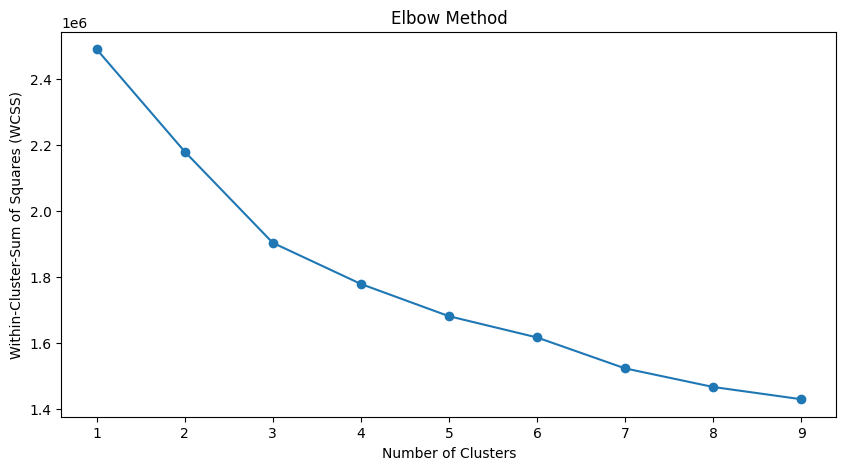

In [21]:

#1.Plot the Within-Cluster-Sum of Squares (WCSS) for different ( K ) values and find the "elbow point."
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  

# Plot the WCSS to find the "elbow"
plt.figure(figsize=(10, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum of Squares (WCSS)')
plt.show()

### 2.2.2 Perform Clustering
- Implement K-Means clustering (or another clustering algorithm) with the optimal number of clusters.
- Assign each client to a cluster and add the cluster labels to the dataset.

In [22]:
#k-mean clustering method:

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(scaled_features)

# inertia on the fitted data
kmeans.inertia_

1903949.7629925886

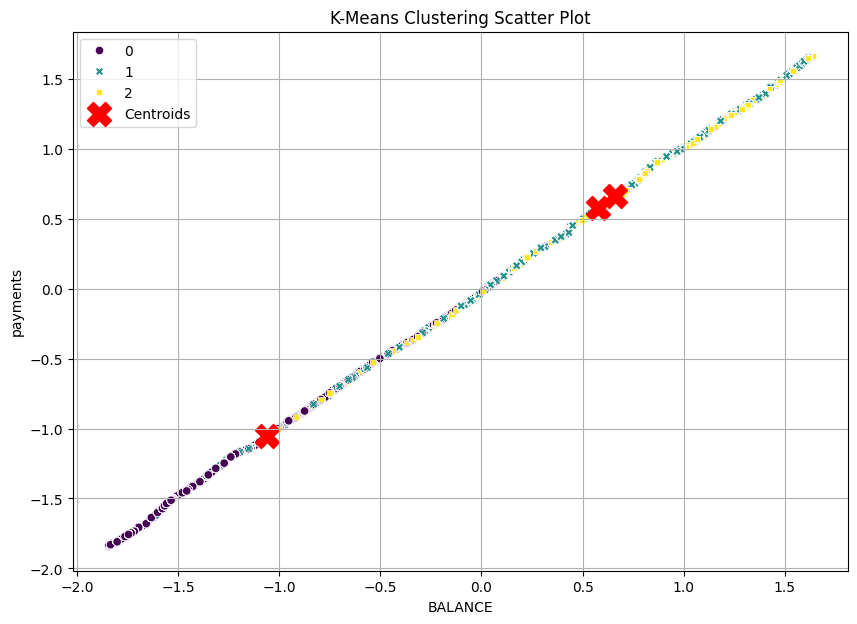

In [23]:
#cluster labels
labels = kmeans.labels_

#centroids of the clusters
centroids = kmeans.cluster_centers_

# Scatter plot of the data points colored by cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=labels,
    palette='viridis',
    style=labels,
    legend="full"
)

# Plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

# Add plot details
plt.title("K-Means Clustering Scatter Plot")
plt.xlabel("BALANCE")
plt.ylabel("payments")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#The graph show that the data points are grouped into three clusters. 
#Represented by different colors and shapes: purple as inactive user, 
#green as frequent user and yellow is high spender.
#The red crosses (X) represent the centroids of each cluster.Centroids are the central points of their 
#respective clusters, calculated as the average position of all points in a cluster.

In [ ]:
#It seems the features were normalized or standardized, as they are centered around 0 and span a similar range.


### 2.2.3 Evaluate the Clusters
- Calculate the **Silhouette Score** for the clusters.
- Visualize the clusters using a scatter plot.


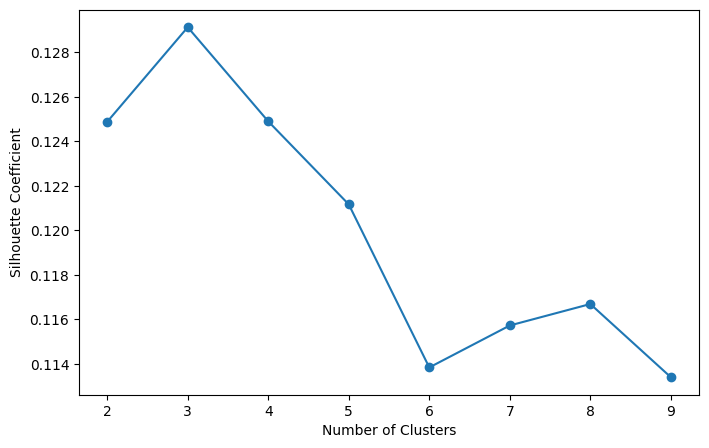

In [24]:

from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 10):
     kmeans = KMeans(n_clusters=k, random_state=42)
     kmeans.fit(scaled_features)
     score = silhouette_score(scaled_features, kmeans.labels_)
     silhouette_coefficients.append(score)


plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_coefficients, marker='o')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
#When approach using Silhouette analysis, the Silhouette score for cluster are all 
#above zero which is may have slightly overlapping or poorly-defined clusters.
#Look for the peak value of the silhouette score, as it indicates the best cluster 
#configuration where the clusters are well-separated and compact.
#The highest silhouette score is for K=3 This suggests that using 3 clusters
#provides the best separation and compactness in the dataset.
#When K is increase, the silhouette score decreases significantly.This indicates 
#that the clusters are becoming less distinct or overlapping as more clusters are added.
#A sharp drop is observed after K=5, suggesting that clustering 
#quality worsens significantly with K more than 5.

### 2.2.4 Analyze the Clusters
- Analyze the characteristics of each cluster:
  - What insights do the clusters provide about the clients?
  - Are there any actionable recommendations for the bank?

---

In [ ]:
#First cluster inactive user, we can see this group may represent 
#individuals or entities with low balances and low payment activity.
#Frequent user,this group likely consists of client with moderate balances and payment activity.
#High spender user is group may correspond to individuals/entities
#with high balances and high payment activity.


In [ ]:
#Suggest strategies :
#From the cluster results, company can target which users that are 
#active and which user is not active. 
#inactive user:Introduce financial literacy programs to encourage 
#saving and investments. Offer low-cost or no-fee accounts to retain these clients.

In [ ]:
#Frequent user:Offer customized financial products, such as mid-sized loans, 
#savings plans, or investment options.Provide loyalty rewards for consistent activity, encouraging further engagement.

In [ ]:
#High spender: Offer high-value investment opportunities, personalized financial
#advisory, and exclusive credit facilities. Retain these clients with VIP treatment and relationship management programs.